In [517]:
from keras.models import Model
import keras.models
import keras.layers as layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from keras import backend as K
from keras_contrib.layers.normalization import InstanceNormalization

import argparse
import cnn_analyzer as cnna
import cnn_builder as cbuild
import cnn_runner as crun
import config
import csv
import niftiutils.helper_fxns as hf
import importlib
import itertools
from math import sqrt, log, pi
import matplotlib.pyplot as plt
import numpy as np
import operator
import os
import pandas as pd
import random
import scipy
%matplotlib inline

In [76]:
importlib.reload(cnet)
importlib.reload(config)
importlib.reload(hf)
importlib.reload(cbuild)
importlib.reload(crun)
C = config.Config()
T = config.Hyperparams()
#T.steps_per_epoch = 50
#T.epochs= 1
#T.get_best_hyperparams()

In [ ]:
crun.run_fixed_hyperparams([C], hyperparams=T)#C_list)

In [ ]:
model = cbuild.build_cnn_hyperparams(T)
model.summary(line_length=150)

In [68]:
Z_reader = ['E103312835_1','12823036_0','12569915_0','E102093118_0','E102782525_0','12799652_0','E100894274_0','12874178_3','E100314676_0','12842070_0','13092836_2','12239783_0','12783467_0','13092966_0','E100962970_0','E100183257_1','E102634440_0','E106182827_0','12582632_0','E100121654_0','E100407633_0','E105310461_0','12788616_0','E101225606_0','12678910_1','E101083458_1','12324408_0','13031955_0','E101415263_0','E103192914_0','12888679_2','E106096969_0','E100192709_1','13112385_1','E100718398_0','12207268_0','E105244287_0','E102095465_0','E102613189_0','12961059_0','11907521_0','E105311123_0','12552705_0','E100610622_0','12975280_0','E105918926_0','E103020139_1','E101069048_1','E105427046_0','13028374_0','E100262351_0','12302576_0','12451831_0','E102929168_0','E100383453_0','E105344747_0','12569826_0','E100168661_0','12530153_0','E104697262_0']
X_test, Y_test, train_generator, num_samples, train_orig, Z = cbuild.get_cnn_data(n=4, n_art=0)#, Z_test_fixed=Z_reader)
Z_test, Z_train_orig = Z
X_train_orig, Y_train_orig = train_orig

In [59]:
#from keras.utils import multi_gpu_model
#model = multi_gpu_model(model, gpus=2)

In [ ]:
hist = model.fit_generator(train_generator, steps_per_epoch=T.steps_per_epoch, epochs=T.epochs, validation_data=[X_test, Y_test])#, callbacks=[T.early_stopping])

In [71]:
model.save('E:\\models\\model_reader_rcnn.hdf5')

In [72]:
import dr_methods as drm
voi_df_art, voi_df_ven, voi_df_eq = drm.get_voi_dfs()
small_voi_df = pd.read_csv(C.small_voi_path)

In [ ]:
#plot_with_bbox(fn_list[2], cls_mapping[wrong_guesses[2]])
Y_pred = model.predict(X_test)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_test])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="weighted")

#save_output(Z_test, y_pred, y_true)

print(accuracy_score(y_true, y_pred))
#y_true_simp, y_pred_simp, _ = cnna.merge_classes(y_true, y_pred)
#print(accuracy_score(y_true_simp, y_pred_simp))

In [3]:
model = keras.models.load_model(os.path.join(C.model_dir, "models_305.hdf5")) #models_305

In [344]:
importlib.reload(cbuild)

<module 'cnn_builder' from 'C:\\Users\\Clinton\\Documents\\voi-classifier\\python\\cnn_builder.py'>

In [312]:
X_test, Y_test, train_generator, num_samples, train_orig, Z = cbuild.get_cnn_data(n=4, n_art=0, Z_test=Z_reader)
Z_test, Z_train_orig = Z
Y_pred = model.predict(X_test)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_test])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])
y_true_simp, y_pred_simp, _ = cbuild.merge_classes(y_true, y_pred)

In [42]:
Y_pred = [C.classes_to_include[y] for y in y_pred]
Y_true = [C.classes_to_include[y] for y in y_true]

In [43]:
a = pd.DataFrame([Z_test,Y_pred,Y_true])

In [45]:
a.to_csv('E:\\temp.csv')

In [205]:
acc6cls = []
acc3cls = []

for i in range(19):
    model_num = 306+i
    X_test, Y_test, train_generator, num_samples, train_orig, Z = cbuild.get_cnn_data(n=4, n_art=0, Z_test=df[df['model_num'] == model_num]["z_test"])
    X_train_orig, Y_train_orig = train_orig
    model = keras.models.load_model(os.path.join(C.model_dir, "models_%d.hdf5" % model_num)) #models_305
    
    Y_pred = model.predict(X_train_orig)
    y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_train_orig])
    y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])

    acc6cls.append(accuracy_score(y_true, y_pred))

    y_true_simp, y_pred_simp, _ = cbuild.merge_classes(y_true, y_pred)

    acc3cls.append(accuracy_score(y_true_simp, y_pred_simp))

In [22]:
df = pd.read_excel("Z:\\Inter-reader study\\Answer key.xlsx")

In [23]:
y_true = df["Class"].values
y_pred = df["Model"].values

In [24]:
cm = confusion_matrix(y_true, y_pred, labels=C.classes_to_include)

In [46]:
for i in range(len(cm)):
    print('\t'.join(cm[:,i].astype(str)))

10	0	1	0	0	1
0	9	1	0	0	0
0	1	8	0	0	0
0	0	0	10	0	0
0	0	0	0	9	0
0	0	0	0	1	9


In [72]:
fn_list = fn_list + list(Z_test[~np.equal(y_pred, y_true)])

In [74]:
fn_list = fn_list + list(Z_train_orig[~np.equal(y_pred, y_true)])
fn_list = fn_list + list(Z_train_orig[~np.equal(y_pred, y_true)])

In [75]:
fn_x_list = [x+"("+str(voi_df_art[voi_df_art["id"] == x[:-4]]["x1"].values[0])+")" for x in fn_list]

In [76]:
unique, counts = np.unique(fn_x_list, return_counts=True)

In [ ]:
dict(zip(unique, counts))

In [195]:
Y_pred = model.predict(X_train_orig)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_train_orig])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="weighted")

#cbuild.save_output(Z_train_orig, y_pred, y_true)#, save_dir=C.output_img_dir+"\\training")

In [5]:
model = keras.models.load_model(os.path.join(C.model_dir, "models_305.hdf5")) #models_305
#cnna.visualize_layer(model, 'conv3d_148')

In [6]:
importlib.reload(cbuild)

<module 'cnn_builder' from 'C:\\Users\\Clinton\\Documents\\voi-classifier\\python\\cnn_builder.py'>

In [6]:
model_dense_outputs = cbuild.build_pretrain_model(model)

In [ ]:
model_dropout = cbuild.build_model_forced_dropout(model, )

In [7]:
orig_data_dict, num_samples = cbuild._collect_unaug_data()

In [8]:
filters_by_cls = {cls: model_dense_outputs.predict(orig_data_dict[cls][0], verbose=False) for cls in C.classes_to_include}

C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


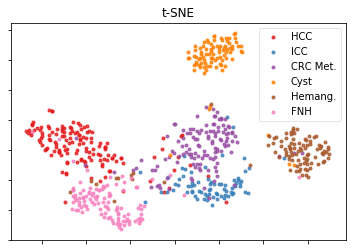

In [10]:
fig = cnna.tsne(filters_by_cls)
fig.show()

In [9]:
filters_by_cls = {cls: model_dense_outputs.predict(orig_data_dict[cls][0], verbose=False) for cls in C.classes_to_include}
filter_results = np.concatenate([filters_by_cls[cls] for cls in C.classes_to_include], axis=0)

filter_avgs = np.mean(filter_results, axis=0)
filter_stds = np.std(filter_results, axis=0)

#filter_cls_avg_unscaled = {cls: np.mean(filter_results[cls], axis=0) for cls in C.classes_to_include}
#filter_cls_avg_scaled = {cls: np.mean(filter_results[cls], axis=0) / filter_avgs for cls in C.classes_to_include}

In [224]:
len(hf.flatten([list(feature_sheet["evidence1"+cls].dropna().values) for cls in C.classes_to_include]))

137

In [40]:
importlib.reload(cnna)
C=config.Config()

In [10]:
features_by_cls, feat_count = cnna.collect_features()
all_features = list(feat_count.keys())
cls_features = {f: [c for c in C.classes_to_include if f in features_by_cls[c]] for f in all_features}

z = dict(zip(*np.unique(features_by_cls['colorectal'], return_counts=True)))
for k in z:
    print(k, " (",z[k],")", sep="")

In [ ]:
feat_count

In [11]:
Z_features = cnna.get_annotated_files(features_by_cls)

In [17]:
feature_filter_means = {}
feature_filter_stds = {}
feature_filters_scaled = {}#{cls: {} for cls in features}
feature_filters = {f:np.empty([0,100]) for f in all_features}

for f in all_features:
    for cls in C.classes_to_include:
        x_features = orig_data_dict[cls][0][np.where(np.isin(orig_data_dict[cls][1], Z_features[f]))]
        if x_features.size > 0:
            feature_filters[f] = np.concatenate([feature_filters[f], model_dense_outputs.predict(x_features, verbose=False)], axis=0)# / filter_avgs
        
    feature_filters[f] = (feature_filters[f] - filter_avgs) / filter_stds
    
    feature_filter_means[f] = np.mean(feature_filters[f], axis=0)# / filter_avgs
    feature_filter_stds[f] = np.std(feature_filters[f], axis=0)# / filter_avgs

    #ff = feature_filters[f]
    #feature_filters[f] = np.where(ff > np.mean(ff), ff, 0)

    #ff = feature_filters[cls][f]
    #feature_filters[cls][f] = np.where(ff > 1*filter_cls_avg_unscaled[cls], ff, 0)

    #ff = feature_filters[f]
    #feature_filters[f] = np.where(ff > 1.3*filter_avgs, ff, 0)

    feature_filters_scaled[f] = feature_filter_means[f] / filter_avgs

In [65]:
num_features = len(all_features) # number of features
num_units = 100 # number of dense units

In [542]:
num_annotations = 5
Z_test = ['E106097391_0', 'E104978772_1', '12900535_0', 'E100150242_0', 'E105490014_0', 'E103147618_0', 'E103510187_0', 'E104657225_0', 'E100551966_0', 'E101388602_0', 'E100215900_8', 'E100215900_7', 'E104045692_0', '13104521_0', 'E100383453_0', '12943286_0', '12271995_0', 'E102315724_0', 'E104949189_0', 'E100511083_1', 'E101579471_0', '13018986_1', '13203550_8', '13112385_0', '12712463_0', '12361082_0', '13028374_0', 'E103985934_1', 'E100529980_0', '12042703_3', '12961059_0', 'E105724706_2', 'E100592424_2', 'E103104254_0', 'E104546069_0', 'E101665217_1', '12090000_0', 'E100592424_1', '12961059_1', 'E105474285_0', '12502068_1', 'E100814791_0', 'E102613189_0', 'E105427046_0', 'E102881031_1', 'E102929168_0', 'E102310482_0', 'E102095465_0', 'E101811299_0', 'E104737273_0', '12890053_0', 'E100168661_1', '12637865_0', 'E100168661_2', '12239783_0', '12707781_0', '12706568_1', '12823036_0', '12404081_0', '12365693_1']

indices_f = [orig_data_dict[cls][1] for cls in C.classes_to_include]
indices_f = hf.flatten(indices_f)

fixed_indices = np.empty([num_features, num_annotations])
for f_ix,f in enumerate(all_features):
    fixed_indices[f_ix, :] = np.where(np.isin(indices_f, random.sample(set(Z_features[f]), num_annotations)))[0]

test_indices = np.where(np.isin(indices_f, Z_test))[0]

heterogeneous 10
nodular or discontinuous enhancement 10
infiltrative 10
continuous enhancing rim 10
progressive or concentric enhancement 10
arterial enhancement 10
regular spherical hypointense mass 10
delayed isointensity 10
hypointense without enhancement 10
central scar 5
hyperintense mass on delayed phase 10
thin well-defined walls 10
lobulated margins 10
venous washout 10
progressive centripetal filling 10


In [384]:
mu = np.empty([num_features, num_units])
sigma = np.empty([num_features, num_units])
m = filter_avgs#np.empty(n) #dense unit mean without features
s = filter_stds#np.empty(n) #dense unit stdev without features

In [385]:
theta_11 = scipy.random.uniform(.2,.3, size=[num_features, num_features])
theta_10 = scipy.random.uniform(.2,.3, size=[num_features, num_features])
theta_01 = scipy.random.uniform(.2,.3, size=[num_features, num_features])

In [386]:
for i in range(num_features):
    mu[i] = feature_filter_means[all_features[i]]
    sigma[i] = feature_filter_stds[all_features[i]]

In [387]:
z_states = [z for z in itertools.product([0,1], repeat=num_features) if sum(z) < 5]
num_states = len(z_states)
num_imgs = filter_results.shape[0]
z_states_bool = [tuple([bool(x) for x in z]) for z in z_states]

In [388]:
p_z_x = np.empty([num_imgs, num_states])
p_x_z = np.empty([num_imgs, num_states])
p_z = np.empty(num_states)
p_x = np.empty(num_imgs)
Z = np.empty(num_imgs)

In [394]:
eps = 10**-300

In [359]:
t=time.time()
for _ in range(num_states*10):
    np.nan_to_num(0)
    #pass
print(time.time()-t)

0.02306342124938965


In [534]:
t=time.time()
for img_ix in range(num_imgs):
    x = filter_results[img_ix]
    
    #f_ixs = [f_ix for f_ix in range(num_features) if img_ix in fixed_indices[f_ix, :]]
    
    for state_ix in range(num_states):
        z = z_states[state_ix]
        p_x_z[img_ix, state_ix] = 1
        
        for u_ix in range(num_units):
            mean = np.dot(mu[:, u_ix], z) + m[u_ix]
            stdev = sqrt(sum(np.where(z==1, sigma[:, u_ix]**2, 0)) + s[u_ix]**2)
            
            p_x_z[img_ix, state_ix] *= 1/stdev * math.exp(-((x[u_ix]-mean)/stdev)**2/2) #norm.pdf(x[u_ix], mean, stdev)
    
    if img_ix % 50 == 0:
        print(img_ix, time.time()-t)

0 2.621065378189087
50 133.53745985031128
100 265.0211684703827
150 390.89515352249146
200 516.8893387317657
250 643.083518743515
300 769.840945482254
350 897.5774037837982
400 1029.1390235424042
450 1158.0776479244232
500 1287.195513010025
550 1416.5434246063232
600 1546.4578974246979


In [538]:
t=time.time()
for state_ix in range(num_states):
    z = z_states[state_ix]
    p_z[state_ix] = 1
    for a in range(num_features):
        p_z[state_ix] *= np.product([theta_11[a,b]**(z[a]*z[b]) * theta_10[a,b]**(z[a]*(1-z[b])) \
                                  * theta_01[a,b]**((1-z[a])*z[b]) * \
                                (1 - theta_11[a,b] - theta_10[a,b] - theta_01[a,b]) ** ((1-z[a])*(1-z[b])) \
                                   for b in range(num_features) if a!=b])

In [539]:
for img_ix in range(num_imgs):
    Z[img_ix] = np.dot(p_x_z[img_ix, :], p_z)
    #sum([p_x_z[img_ix, state_ix]*p_z[state_ix] for state_ix in range(num_states)])
print(time.time()-t)

t=time.time()
for img_ix in range(num_imgs):
    for state_ix in range(num_states):
        p_z_x[img_ix, state_ix] = np.nan_to_num(p_x_z[img_ix, state_ix] / Z[img_ix] * p_z[state_ix])
print(time.time()-t)

1.2112228870391846


C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


15.702779769897461


In [638]:
for test_ix in test_indices[13:]:
    p_zi_x = np.zeros([num_features])
    for f_ix in range(num_features):
        state_ixs = [state_ix for state_ix in range(num_states) if z_states_bool[state_ix][f_ix]]
        p_zi_x[f_ix] = sum(p_z_x[test_ix, state_ixs])
        #for f,strength in sorted(enumerate(p_zi_x), key=lambda x:x[1], reverse=True):
        #    output[z] = output[z] + [f, strength]
    break

In [592]:
np.argsort(p_zi_x)[::-1]

array([13,  5,  6,  8, 14,  2,  4,  7, 11, 12, 10,  9,  3,  1,  0],
      dtype=int64)

In [588]:
p_zi_x

array([0.00000000e+000, 0.00000000e+000, 3.50242452e-112, 0.00000000e+000,
       4.83651542e-115, 1.05727287e-068, 1.29164837e-078, 1.17060456e-207,
       4.97439574e-080, 0.00000000e+000, 0.00000000e+000, 6.23142603e-296,
       0.00000000e+000, 1.62877111e-042, 1.31119552e-106])

In [639]:
for f,strength in sorted(enumerate(p_zi_x), key=lambda x:x[1], reverse=True):
    if strength==0:
        break
    print(all_features[f], -80/log(strength))

infiltrative 0.6193980256219328
progressive or concentric enhancement 0.5101249562784003
progressive centripetal filling 0.4365394360701675
regular spherical hypointense mass 0.3413705999347494
arterial enhancement 0.3247717447201581
venous washout 0.3241805702526745
hypointense without enhancement 0.2986651979541879
delayed isointensity 0.15911879699347423
thin well-defined walls 0.1174462897171592


In [640]:
for cls in C.classes_to_include:
    x_test_quick = orig_data_dict[cls][0][np.where(orig_data_dict[cls][1] == indices_f[test_ix])]
    if len(x_test_quick) > 0:
        break

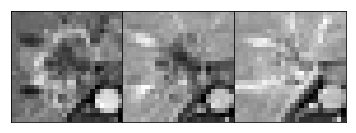

In [641]:
hf.draw_slices(x_test_quick[0])

In [567]:
num_states

1941

In [571]:
max_val = np.amax(p_z_x[test_ix])

In [573]:
list(p_z_x[test_ix]).index(max_val)

0

In [ ]:
p_z_x[img_ix, state_ix]

In [ ]:
Z_test[test_indices]

In [537]:
p_z_x_sum = np.sum(p_z_x, axis=0)

t=time.time()
for a in range(num_features):
    for b in range(num_features):
        num11 = 0
        den11 = eps
        num10 = 0
        den10 = eps
        num01 = 0
        den01 = eps
        for state_ix in range(num_states):
            z = z_states_bool[state_ix]
            num11 += p_z_x_sum[state_ix] * z[a]*z[b] * (1 - theta_10[a,b] - theta_01[a,b])
            den11 += p_z_x_sum[state_ix] * (z[a]*z[b] + (not z[a] and not z[b]))
            num10 += p_z_x_sum[state_ix] * (z[a] and not z[b]) * (1 - theta_11[a,b] - theta_01[a,b])
            den10 += p_z_x_sum[state_ix] * ((z[a] and not z[b]) + (not z[a] and not z[b]))
            num01 += p_z_x_sum[state_ix] * (not z[a] and z[b]) * (1 - theta_11[a,b] - theta_10[a,b])
            den01 += p_z_x_sum[state_ix] * ((not z[a] and z[b]) + (not z[a] and not z[b]))
            
        theta_11[a,b] = num11 / den11
        theta_10[a,b] = num10 / den10
        theta_01[a,b] = num01 / den01
print(time.time()-t)

5.071509122848511


In [393]:
mu_est = np.empty([num_features, num_units])
sigma_est = np.empty([num_features, num_units])
m_est = np.empty([num_units])
s_est = np.empty([num_units])

In [395]:
t=time.time()
for f_ix in range(num_features):
    state_indices = [state_ix for state_ix in range(num_states) if z_states_bool[state_ix][f_ix]]
    #p_z_x does not need to be rescaled because the factor cancels out
    
    for u_ix in range(num_units):
        num = 0
        den = eps
            
        for state_ix in state_indices:
            z = z_states[state_ix]

            mean_adj = np.dot(mu[:, u_ix], z) + m[u_ix] - mu[f_ix, u_ix]
            var = sum(np.where(z==1, sigma[:, u_ix]**2, 0)) + s[u_ix]**2
            
            den += sum(p_z_x[:, state_ix])/var
        
            for img_ix in range(num_imgs):
                x = filter_results[img_ix]
                
                num += p_z_x[img_ix, state_ix]/var * (x[u_ix] - mean_adj)
            
        mu_est[f_ix, u_ix] = num / den
        
        if u_ix % 20 == 0:
            print(f_ix, u_ix, time.time()-t)

0 0 0.8599724769592285
0 20 17.66833209991455
0 40 34.467323541641235
0 60 51.245535373687744
0 80 67.97320699691772
1 0 84.78826069831848
1 20 101.55088424682617
1 40 118.31829285621643
1 60 135.13962411880493
1 80 151.93313121795654
2 0 168.7690463066101
2 20 185.6224856376648
2 40 202.55252313613892
2 60 219.43226790428162
2 80 236.60580706596375
3 0 253.4892578125
3 20 270.2965865135193
3 40 287.0790777206421
3 60 303.8965811729431
3 80 320.6885437965393
4 0 337.5436637401581
4 20 354.3544194698334
4 40 371.14159774780273
4 60 387.99908423423767
4 80 404.7985110282898
5 0 421.6123926639557
5 20 438.43750619888306
5 40 455.43953371047974
5 60 472.23641633987427
5 80 489.0885012149811
6 0 506.318776845932
6 20 523.6712820529938
6 40 541.771507024765
6 60 559.5619184970856
6 80 578.1211767196655
7 0 595.1543819904327
7 20 612.2966403961182
7 40 629.1446936130524
7 60 647.3160920143127
7 80 665.0124650001526
8 0 682.9683465957642
8 20 700.5217552185059
8 40 718.2401683330536
8 60 735.8

In [411]:
t=time.time()
for u_ix in range(num_units):
    num = 0
    den = eps

    for state_ix in range(num_states):
        z = z_states[state_ix]

        mean_adj = np.dot(mu[:, u_ix], z)
        var = sum(np.where(z==1, sigma[:, u_ix]**2, 0)) + s[u_ix]**2

        den += sum(p_z_x[:, state_ix])/var

        for img_ix in range(num_imgs):
            x = filter_results[img_ix]

            num += p_z_x[img_ix, state_ix]/var * (x[u_ix] - mean_adj)

    m_est[u_ix] = num / den

    if u_ix % 20 == 0:
        print(u_ix, time.time()-t)

0 3.650278329849243
20 75.15615200996399
40 152.15717029571533
60 229.84071922302246
80 301.8481867313385


In [463]:
x = 1000#sigma[f_ix, u_ix]

In [464]:
x

0.46076219238357524

In [465]:
sum([a_i[state_ix]/(x+var_adj[state_ix])**2 - c_i[state_ix]/(x+var_adj[state_ix]) for state_ix in state_indices])

-20.923248892164647

In [502]:
Var = np.concatenate([sigma[:, u_ix]**2, [s[u_ix]]])

In [503]:
Var

array([0.46076219, 0.22555066, 0.33960356, 0.83688609, 0.22249132,
       0.43919579, 0.87847702, 0.47189457, 0.95209651, 0.11004817,
       0.5645426 , 1.11969081, 0.56483425, 0.43554433, 0.36115151,
       0.79101551])

In [504]:
sum([a_i[state_ix]/(sum(np.where(z_states[state_ix]==1, Var[:-1], 0))+Var[-1])**2 - \
                 c_i[state_ix]/(sum(np.where(z_states[state_ix]==1, Var[:-1], 0))+Var[-1]) for state_ix in range(5)])

-97.87535466771777

In [ ]:
t=time.time()
for f_ix in range(num_features):
    state_indices = [state_ix for state_ix in range(num_states) if z_states_bool[state_ix][f_ix]]
    #p_z_x does not need to be rescaled because the factor cancels out
    var_adj = np.zeros([num_states])
    a_i = np.zeros([num_states])
    c_i = np.zeros([num_states])
    
    for u_ix in range(num_units):
        for state_ix in state_indices:
            z = z_states[state_ix]

            mean = np.dot(mu[:, u_ix], z) + m[u_ix]
            var_adj[state_ix] = sum(np.where(z==1, sigma[:, u_ix]**2, 0)) + s[u_ix]**2 - sigma[f_ix, u_ix]**2
            
            a_i[state_ix] = sum([p_z_x[img_ix, state_ix] * (filter_results[img_ix, u_ix] - mean)**2 for img_ix in range(num_imgs)])
            c_i[state_ix] = sum(p_z_x[:, state_ix])
        
        sigma_est[f_ix, u_ix] = sqrt(scipy.optimize.fsolve(lambda x: sum([a_i[state_ix]/(x+var_adj[state_ix])**2 - \
                                         c_i[state_ix]/(x+var_adj[state_ix]) for state_ix in state_indices]), \
                                          sigma[f_ix, u_ix]))
        
        if u_ix % 20 == 0:
            print(f_ix, u_ix, time.time()-t)

In [529]:
t=time.time()
#state_indices = [state_ix for state_ix in range(num_states) if z_states_bool[state_ix][f_ix]]
var_adj = np.zeros([num_states])
a_i = np.zeros([num_states])
c_i = np.zeros([num_states])

for u_ix in range(num_units):
    for state_ix in range(num_states):
        mean = np.dot(mu[:, u_ix], z_states[state_ix]) + m[u_ix]
        a_i[state_ix] = sum([p_z_x[img_ix, state_ix] * (filter_results[img_ix, u_ix] - mean)**2 for img_ix in range(num_imgs)]) / 2
        c_i[state_ix] = sum(p_z_x[:, state_ix])

    temp = scipy.optimize.minimize(\
                lambda Var: sum([a_i[state_ix] * (sum(np.where(z_states[state_ix]==1,
                   Var[:-1], 0))+Var[-1])**(-2) - c_i[state_ix]*log((sum(np.where(z_states[state_ix]==1,
                   Var[:-1], 0))+Var[-1])**(-.5) / sqrt(2*pi)) for state_ix in range(num_states)]),
                  np.concatenate([sigma[:, u_ix]**2, [s[u_ix]**2]]), 
                  bounds=tuple(itertools.repeat((eps, None),num_features+1)))
    
    s_est[u_ix] = temp['x'][-1]
    sigma_est[:, u_ix] = temp['x'][:-1]
    if u_ix % 20 == 0:
        print(u_ix, time.time()-t)

0 5.01324200630188


C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


20 193.7274510860443
40 379.603227853775
60 545.0343754291534
80 729.5346567630768


In [533]:
sigma = sigma_est
s = s_est
m = m_est
mu = mu_est

t=time.time()
#state_indices = [state_ix for state_ix in range(num_states) if z_states_bool[state_ix][f_ix]]
#p_z_x does not need to be rescaled because the factor cancels out
var_adj = np.zeros([num_states])
a_i = np.zeros([num_states])
c_i = np.zeros([num_states])

for u_ix in range(num_units):
    for state_ix in range(num_states):
        mean = np.dot(mu[:, u_ix], z_states[state_ix]) + m[u_ix]
        a_i[state_ix] = sum([p_z_x[img_ix, state_ix] * (filter_results[img_ix, u_ix] - mean)**2 for img_ix in range(num_imgs)])
        c_i[state_ix] = sum(p_z_x[:, state_ix])

    temp = scipy.optimize.linearmixing(\
                lambda Var: sum([a_i[state_ix]/(sum(np.where(z_states[state_ix]==1, Var[:-1]**2, 0))+Var[-1]**2)**2 - \
                 c_i[state_ix]/(sum(np.where(z_states[state_ix]==1, Var[:-1]**2, 0))+Var[-1]**2) for state_ix in range(num_states)]), \
                  np.concatenate([sigma[:, u_ix], [s[u_ix]]]), verbose=True, maxiter=10000)
    
    #sigma_est[:, u_ix]
    if u_ix % 20 == 0:
        print(u_ix, time.time()-t)
    break

t=time.time()
for f_ix in range(num_features):
    state_indices = [state_ix for state_ix in range(num_states) if z_states_bool[state_ix][f_ix]]
    #p_z_x does not need to be rescaled because the factor cancels out
    var_adj = np.zeros([num_states])
    a_i = np.zeros([num_states])
    c_i = np.zeros([num_states])
    
    for u_ix in range(num_units):
        for state_ix in state_indices:
            z = z_states[state_ix]

            mean = np.dot(mu[:, u_ix], z) + m[u_ix]
            var_adj[state_ix] = sum(np.where(z==1, sigma[:, u_ix]**2, 0)) + s[u_ix]**2 - sigma[f_ix, u_ix]**2
            
            a_i[state_ix] = sum([p_z_x[img_ix, state_ix] * (filter_results[img_ix, u_ix] - mean)**2 for img_ix in range(num_imgs)])
            c_i[state_ix] = sum(p_z_x[:, state_ix])
        
        sigma_est[f_ix, u_ix] = sqrt(scipy.optimize.fsolve(lambda x: sum([a_i[state_ix]/(x+var_adj[state_ix])**2 - \
                                         c_i[state_ix]/(x+var_adj[state_ix]) for state_ix in state_indices]), \
                                          sigma[f_ix, u_ix]))
        
        if u_ix % 20 == 0:
            print(f_ix, u_ix, time.time()-t)

header = ['filter_num']
for cls in C.classes_to_include:
    header += [f+"_"+cls for f in features_by_cls[cls]]

with open('E:\\feature_filters.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)
    for f_num in range(100):
        writer.writerow([f_num] + [feature_filters[f][f_num] for cls in features for f in features_by_cls[cls]])

In [98]:
Z_test_features = ['E106097391_0', 'E104978772_1', '12900535_0', 'E100150242_0', 'E105490014_0', 'E103147618_0', 'E103510187_0', 'E104657225_0', 'E100551966_0', 'E101388602_0', 'E100215900_8', 'E100215900_7', 'E104045692_0', '13104521_0', 'E100383453_0', '12943286_0', '12271995_0', 'E102315724_0', 'E104949189_0', 'E100511083_1', 'E101579471_0', '13018986_1', '13203550_8', '13112385_0', '12712463_0', '12361082_0', '13028374_0', 'E103985934_1', 'E100529980_0', '12042703_3', '12961059_0', 'E105724706_2', 'E100592424_2', 'E103104254_0', 'E104546069_0', 'E101665217_1', '12090000_0', 'E100592424_1', '12961059_1', 'E105474285_0', '12502068_1', 'E100814791_0', 'E102613189_0', 'E105427046_0', 'E102881031_1', 'E102929168_0', 'E102310482_0', 'E102095465_0', 'E101811299_0', 'E104737273_0', '12890053_0', 'E100168661_1', '12637865_0', 'E100168661_2', '12239783_0', '12707781_0', '12706568_1', '12823036_0', '12404081_0', '12365693_1']

x_test = {cls: orig_data_dict[cls][0][np.where(np.isin(orig_data_dict[cls][1], Z_test_features))] for cls in C.classes_to_include}
Z_test = {cls: orig_data_dict[cls][1][np.where(np.isin(orig_data_dict[cls][1], Z_test_features))] for cls in C.classes_to_include}

In [ ]:
# Least squares approach
Theta = np.array([feature_filter_means[f] for f in all_features])
Theta = np.transpose(Theta, (1,0))

filters_test = {}
features_test = {}
for cls in C.classes_to_include:
    filters_test[cls] = model_dense_outputs.predict(x_test[cls], verbose=False)
    filters_test[cls] = (filters_test[cls] - filter_avgs) / filter_stds
    features_test[cls] = np.linalg.lstsq(Theta, np.transpose(filters_test[cls], (1,0)))[0]
    #filters_test[cls] = np.apply_along_axis(lambda x: x / filter_avgs, 1, filters_test[cls])

In [33]:
from sklearn.decomposition import FactorAnalysis

In [99]:
fa = FactorAnalysis(10)

In [36]:
filter_results.shape

(637, 100)

In [89]:
from numpy import matmul, diag

In [87]:
def covar_to_corr(covar):
    A = np.diag(np.diag(covar)**(-0.5))
    return np.matmul(np.matmul(A, covar), A)

In [90]:
corr = covar_to_corr(dummy_fa.get_covariance())

In [ ]:
np.linalg.eigvals(corr - np.linalg.pinv(np.diag(np.diag(np.linalg.pinv(corr)))))

In [ ]:
def get_cutoff_eigenval()

In [65]:
dummy = np.random.normal(size=filter_results.shape)
dummy_fa = FactorAnalysis()
dummy_fa.fit(dummy)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=None,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [ ]:
np.linalg.eigvals(dummy_fa.get_covariance())

In [101]:
sum(np.linalg.eigvals(fa.get_covariance()) > np.mean(np.linalg.eigvals(dummy_fa.get_covariance())))

8

In [100]:
fa.fit(filter_results)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=10,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [ ]:
np.linalg.eigvals()

In [53]:
x=3
fa.get_covariance()[x,x] - fa.noise_variance_[x]

0.89081373261106078

cls = "colorectal"
x_test_quick = orig_data_dict[cls][0][np.where(orig_data_dict[cls][1] == "E105724706_2.npy")]
x_test_quick = orig_data_dict["fnh"][0][np.where(orig_data_dict["fnh"][1] == "E104189184_0.npy")]
filters_quick = model_dense_outputs.predict(x_test_quick, verbose=False)

In [ ]:
img_num = 0
evidence = {}

for f in all_features:
    evidence[f + "/" + str(cls_features[f])] = cnna.get_evidence_strength(feature_filters[f], filters_quick[0])#filters_test[true_cls][img_num])
    #max_strength = max(max_strength, evidence[f + "/" + str(cls_features[f])])

#for f in evidence:
#    evidence[f] /= max_strength
print("Detected features:")
for f,strength in sorted(evidence.items(), key=lambda x:x[1], reverse=True)[:5]:
    #if strength > 1:
    print("- " + f, "- %d%%" % (strength*100))

hf.plot_section_auto(x_test_quick[0])#[true_cls][img_num])

In [101]:
output = {}
for cls in C.classes_to_include:
    for img_num in range(len(filters_test[cls])):
        z = Z_test[cls][img_num]
        x = np.expand_dims(x_test[cls][img_num], axis=0)
        evidence = {}
        
        output[z] = [cls]
        
        preds = model.predict(x, verbose=False)[0]
        for pred_cls, pred_conf in sorted(zip(C.classes_to_include, preds), key=lambda x:x[1], reverse=True)[:2]:
            output[z] = output[z] + [pred_cls]
        
        #for f in all_features:
        #    evidence[f + "/" + str(cls_features[f])] = get_evidence_strength(feature_filters[f], filters_test[cls][img_num])
        
        for i in range(len(all_features)):
            evidence[all_features[i] + "/" + str(cls_features[all_features[i]])] = features_test[cls][i, img_num]
        
        f1='infiltrative'
        f2='lobulated margins'
        if evidence[f1 + "/" + str(cls_features[f1])] < evidence[f2 + "/" + str(cls_features[f2])]:
            evidence.pop(f1 + "/" + str(cls_features[f1]))
        else:
            evidence.pop(f2 + "/" + str(cls_features[f2]))
        
        for f,strength in sorted(evidence.items(), key=lambda x:x[1], reverse=True):
            output[z] = output[z] + [f, strength]

In [104]:
with open('E:\\filters_pred5.csv', 'w', newline='') as csvfile:
    header = ['img_fn', 'agreement1', 'agreement2', 'true_cls', 'pred_cls1', 'pred_cls2'] + \
            [s for i in range(len(all_features)) for s in ['feature_%d' % i,'strength_%d' % i]]
    writer = csv.writer(csvfile)
    writer.writerow(header)
    for z_num in range(len(Z_test_features)):
        writer.writerow([Z_test_features[z_num]] + [output[Z_test_features[z_num]][0] in output[Z_test_features[z_num]][3], \
                        output[Z_test_features[z_num]][0] in output[Z_test_features[z_num]][5]] + output[Z_test_features[z_num]])